In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [100]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

In [101]:
# z_test = ( x ̅  - μ )  /  ( σ / √n ) 

z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

-2.5298221281347035

In [102]:
# from z-table we found z score at the level of our alpha = 0.01 which is critical point 

Zα = -2.325

In [103]:
Zα = -2.325  # Zα : z_test

if z_test < Zα:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


In [104]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

-2.5298221281347035

In [105]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue

# z_test's cdf gives the left-hand area as probability . We call this p_value. 

0.005706018193000826

In [106]:
# Comparing "p_value" with "α" value
 
alpha = 0.01   # (α = 1% --> 1-99%) it is given in the question

if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Hyphotesis

see two type of soils and calculate the means of them

In [107]:
dfsoil = pd.read_csv("soil - Sheet1.csv", sep = ",")

In [108]:
dfsoil.head()


,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [109]:
dfsoil.shape

(35, 2)

In [110]:
dfsoil["Soil1"].mean()

1.6918

In [111]:
dfsoil["Soil2"].mean()

1.4171142857142855

Calculate the T_test for the means of two independent samples of scores.

H0 : mu1 = mu2

H1 : mu1 != mu2

In [112]:
stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [113]:
dfsoil.isnull().value_counts()

Soil1  Soil2
False  False    30
True   False     5
dtype: int64

In [114]:
dfsoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [115]:
dfsoil.isnull()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [116]:
indTest = stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"], nan_policy='omit')

indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [117]:
indTest.statistic

5.1681473319343345

In [118]:
indTest.pvalue

2.5932287323528147e-06

In [119]:
alpha = 0.01      # alpha/2 = 0.005

if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [120]:
neg_t_005 = stats.t.ppf(0.005, 63)  # negative t-score of significant level for α = 0.01

neg_t_005

-2.6561450297622597

In [121]:
neg_t_005 = -2.6561450297622597

if indTest.statistic > abs(neg_t_005):    # without abs() function--> if  indTest.statistic < - neg_t_005
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


In [122]:
pozt005 = stats.t.ppf(0.995, 63) # positive t-score of significant level for α = 0.01

pozt005

2.656145029762259

In [123]:
posz005 = 2.6561450297622597

if indTest.statistic > posz005:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats. 2015 PISA Test Dataset

(i) Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

SOLUTION

(i) Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [124]:
dfpisa = pd.read_csv("2015 PISA Test - Sheet1.csv", sep = ",")

dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [125]:
dfpisa.sample(20)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
52,NZL,OC,88.222889,495.2233,509.2707,513.3035
16,DEU,EU,87.589800,505.9713,509.1041,509.1406
40,LTU,EU,71.378000,478.3834,472.4066,475.4089
49,MYS,AS,71.064068,446.1098,430.5782,442.9475
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
63,THA,AS,39.316127,415.4638,409.1301,421.3373
67,URY,SA,64.600000,417.9919,436.5721,435.3630
24,GBR,EU,92.000300,492.4785,497.9719,509.2215
9,CHE,EU,87.479056,521.2506,492.1982,505.5058
56,QAT,AS,92.884826,402.4007,401.8874,417.6112


In [126]:
dfpisa[dfpisa['Continent_Code'].isnull()==True]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [127]:
dfpisa['Continent_Code'].fillna(value='NA', inplace = True)

In [128]:
dfpisa[dfpisa['Continent_Code']=='NA'].head(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [129]:
dfpisa.shape

(70, 6)

In [130]:
dfpisa.describe()  # for all continents

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [131]:
dfpisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

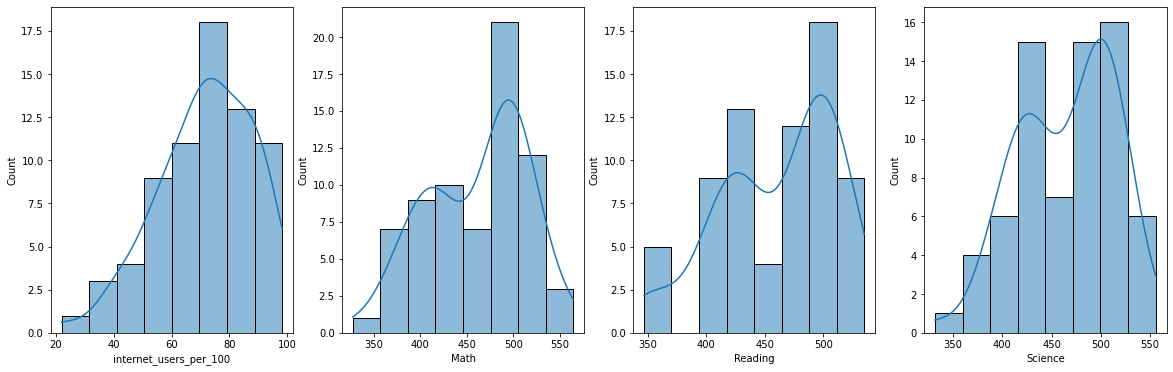

In [132]:
fig, axes = plt.subplots(1,4, figsize=(20,6))

sns.histplot(dfpisa['internet_users_per_100'], kde=True, ax=axes[0])
sns.histplot(dfpisa['Math'], kde=True, ax=axes[1])
sns.histplot(dfpisa['Reading'], kde=True, ax=axes[2])
sns.histplot(dfpisa['Science'], kde=True, ax=axes[3]);

Analysis for EU

In [133]:
dfEU = dfpisa[dfpisa["Continent_Code"]=="EU"]
dfEU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [134]:
dfpisa[dfpisa["Continent_Code"]=="EU"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [135]:
dfEU.shape

(37, 6)

In [136]:
dfEU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

In [137]:
np.sqrt(1235.550805)

35.15040262927297

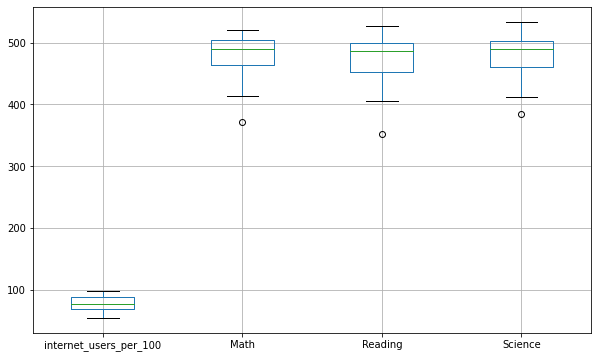

In [138]:
dfEU.boxplot(figsize=(10,6));

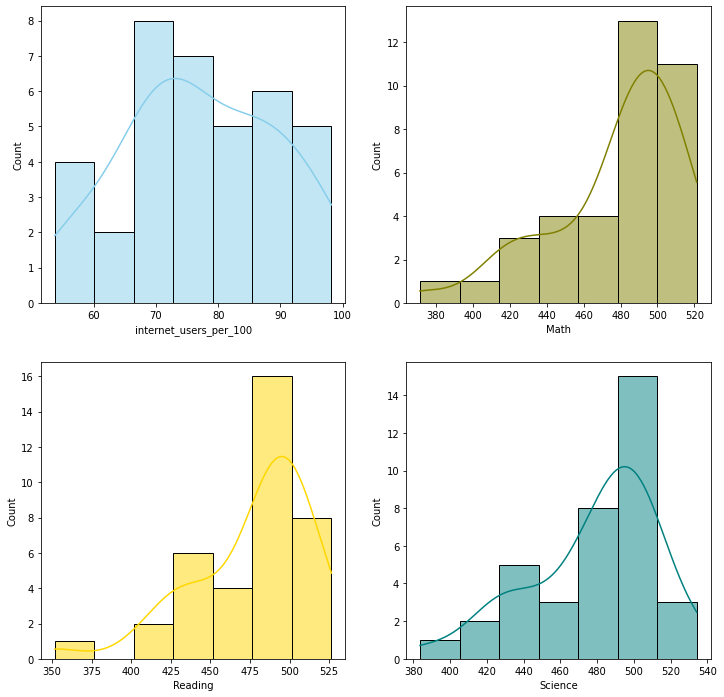

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=dfEU, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfEU, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfEU, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfEU, x="Science", kde=True, color="teal", ax=axs[1, 1]);

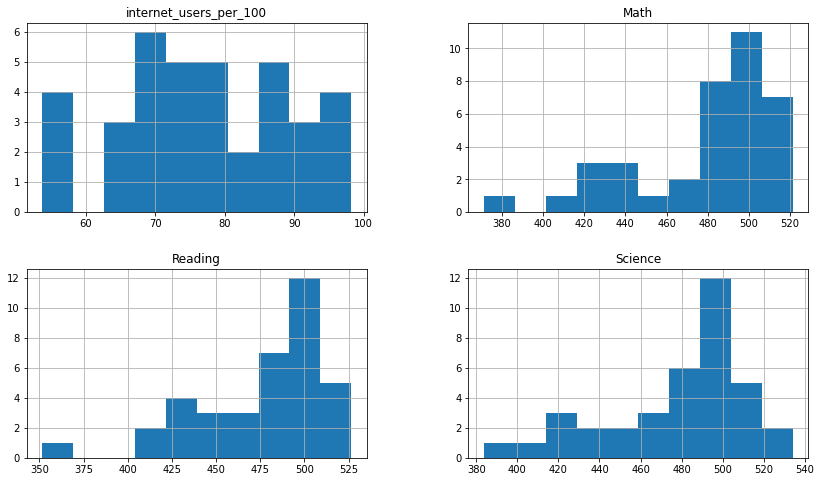

In [140]:
dfEU.hist(figsize=[14,8]);

Analysis for AS

In [141]:
dfAS = dfpisa[dfpisa["Continent_Code"]=="AS"]
dfAS

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
38,KOR,AS,89.648631,524.1062,517.4367,515.8099


In [142]:
dfAS.shape

(17, 6)

In [143]:
dfAS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [144]:
dfAS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

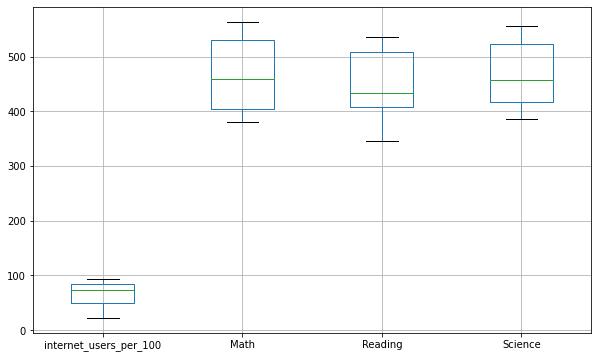

In [145]:
dfAS.boxplot(figsize=(10, 6));

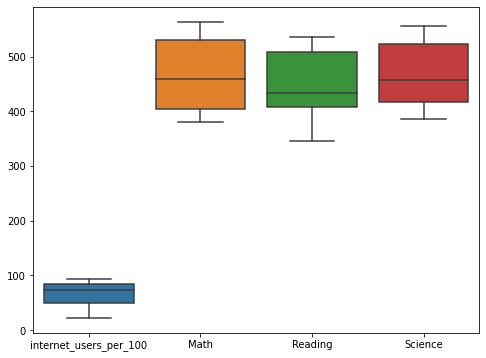

In [146]:
fig = plt.subplots(figsize=(8, 6))

sns.boxplot(data=dfAS);

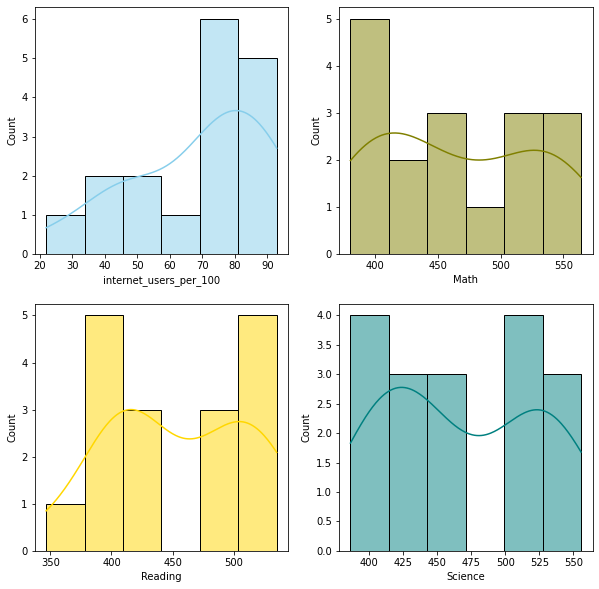

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfAS, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfAS, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfAS, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfAS, x="Science", kde=True, color="teal", ax=axs[1, 1]);

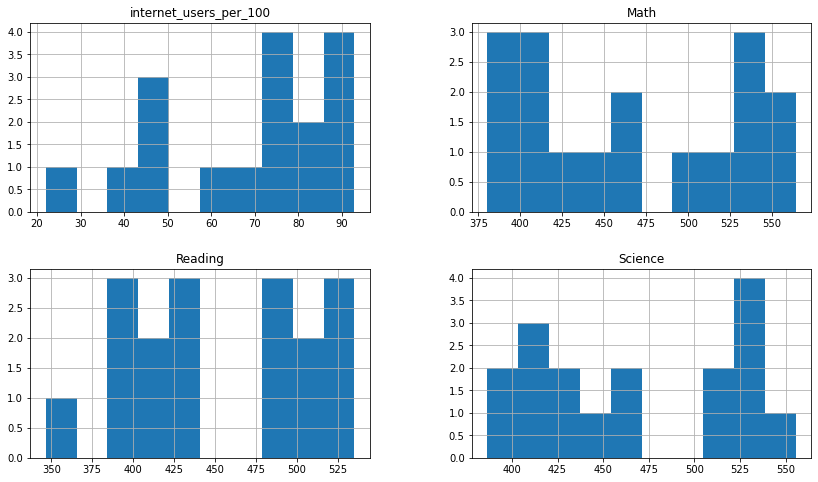

In [148]:
dfAS.hist(figsize=[14,8]);

In [149]:
dfpisa[dfpisa["Continent_Code"]=="AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [150]:
dfSA = dfpisa[dfpisa["Continent_Code"]=="SA"]
dfSA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
67,URY,SA,64.600000,417.9919,436.5721,435.3630


In [151]:
dfSA.shape

(7, 6)

In [152]:
dfSA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [153]:
dfSA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

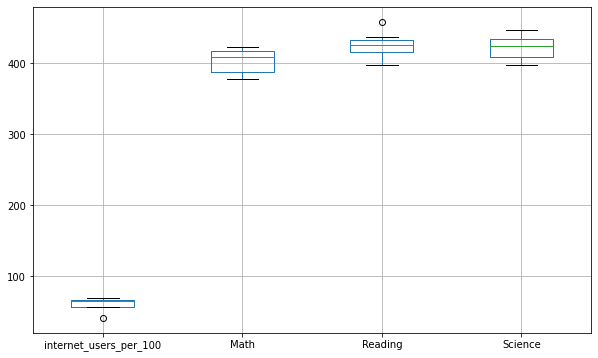

In [154]:
dfSA.boxplot(figsize=(10, 6));

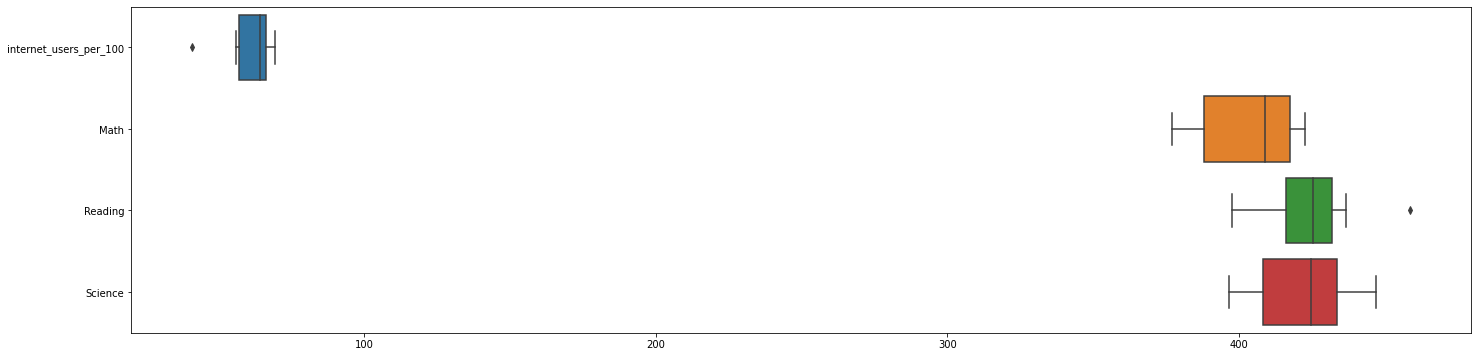

In [155]:
fig = plt.subplots(figsize= (24,6))

sns.boxplot(data=dfSA, orient="h");

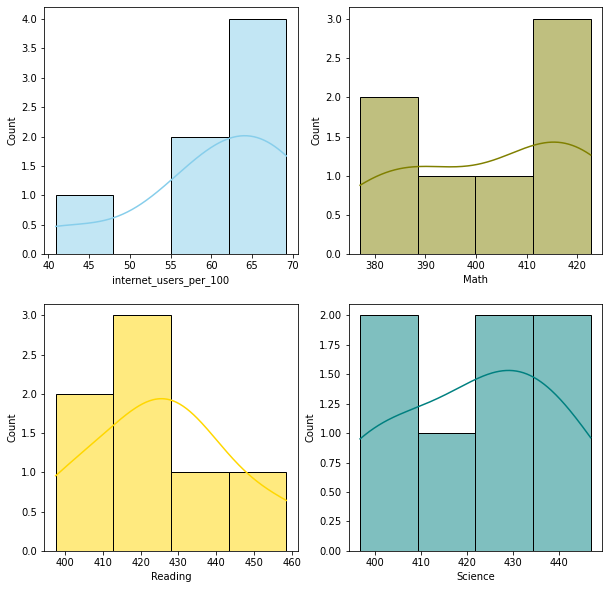

In [156]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfSA, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfSA, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfSA, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfSA, x="Science", kde=True, color="teal", ax=axs[1, 1]);

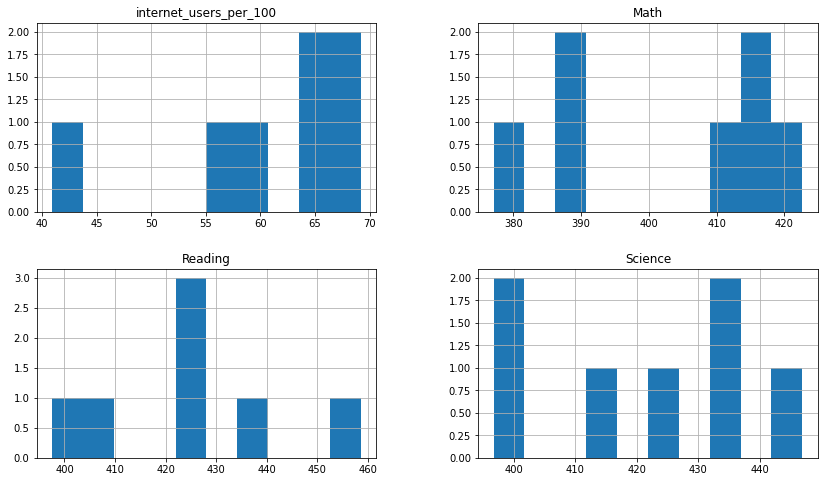

In [157]:
dfSA.hist(figsize=[14,8]);

Analysis for OC

In [158]:
dfOC = dfpisa[dfpisa["Continent_Code"]=="OC"]
dfOC

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [159]:
dfOC.shape

(2, 6)

In [160]:
dfOC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [161]:
dfOC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

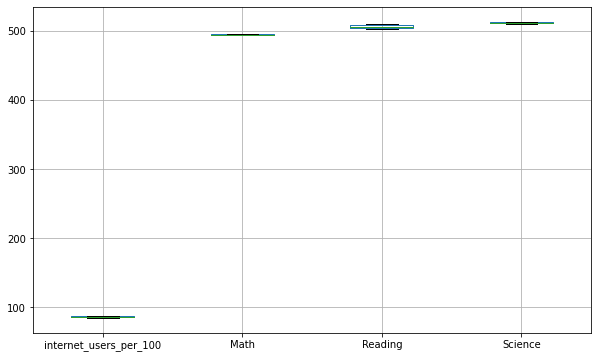

In [162]:
dfOC.boxplot(figsize=(10, 6));

In [163]:
dfOC3columns = dfSA[["Math", "Reading", "Science"]]
dfOC3columns

,Math,Reading,Science
2,409.0333,425.3031,432.2262
7,377.0695,407.3486,400.6821
10,422.6714,458.5709,446.9561
12,389.6438,424.9052,415.7288
53,386.5606,397.5414,396.6836
64,417.2434,427.2733,424.5905
67,417.9919,436.5721,435.3630


In [164]:
dfOCinternet = dfOC[["internet_users_per_100"]]
dfOCinternet

,internet_users_per_100
3,84.560519
52,88.222889


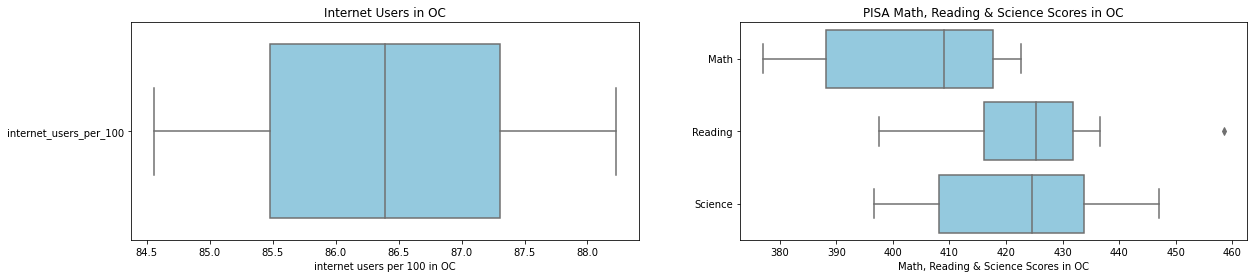

In [165]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sns.boxplot(data=dfOCinternet, orient='h', ax=axes[0], color="skyblue").set(title='Internet Users in OC')
sns.boxplot(data=dfOC3columns, orient='h', ax=axes[1], color="skyblue").set(title='PISA Math, Reading & Science Scores in OC')

axes[0].set(xlabel='internet users per 100 in OC')
axes[1].set(xlabel='Math, Reading & Science Scores in OC');

# the plot is more readable now!

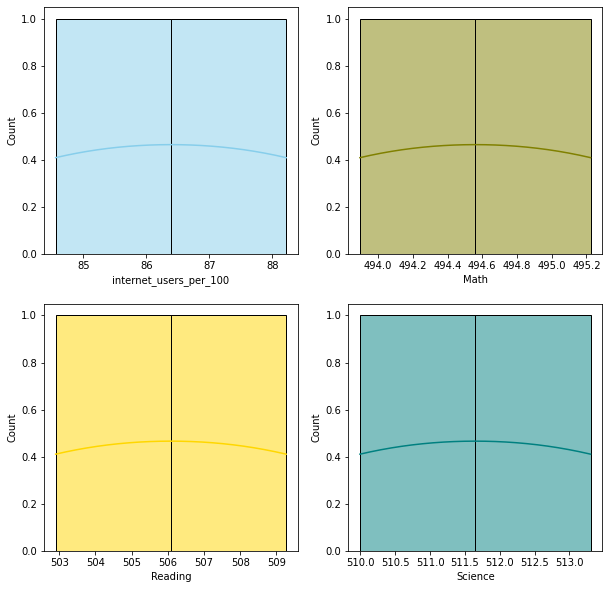

In [166]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfOC, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfOC, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfOC, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfOC, x="Science", kde=True, color="teal", ax=axs[1, 1]);

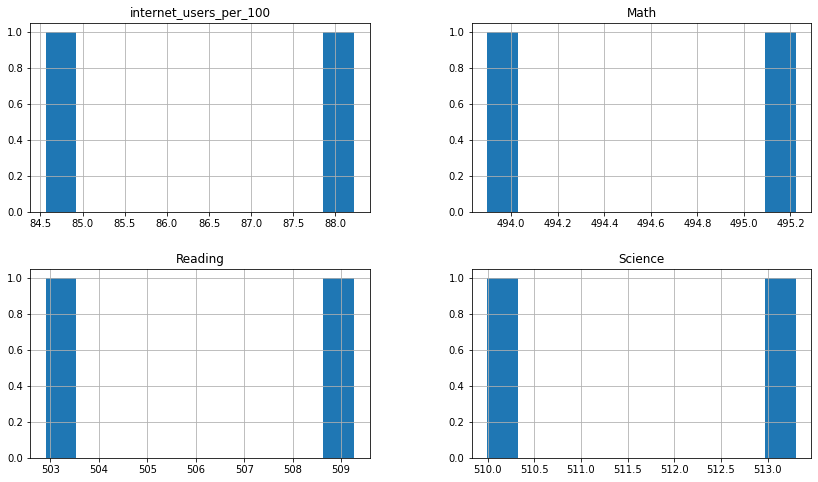

In [167]:
dfOC.hist(figsize=[14,8]);

Analysis for AF

In [168]:
dfAF = dfpisa[dfpisa["Continent_Code"]=="AF"]
dfAF

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [169]:
dfAF.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [170]:
dfAF.shape

(2, 6)

In [171]:
dfAF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64

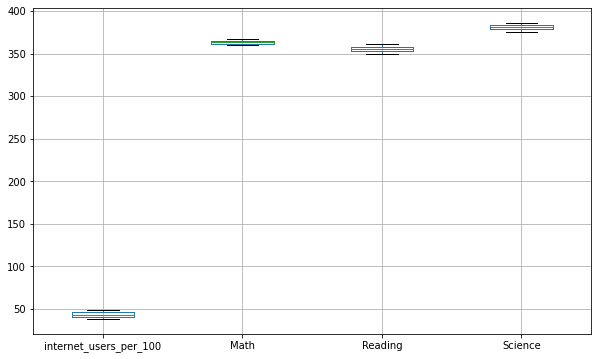

In [172]:
dfAF.boxplot(figsize=(10, 6));

In [173]:
dfAF3columns = dfAF[["Math", "Reading", "Science"]]
dfAF3columns

,Math,Reading,Science
19,359.6062,349.8593,375.7451
65,366.8180,361.0555,386.4034


In [174]:
dfAFinternet = dfAF[["internet_users_per_100"]]
dfAFinternet

,internet_users_per_100
19,38.200000
65,48.519836


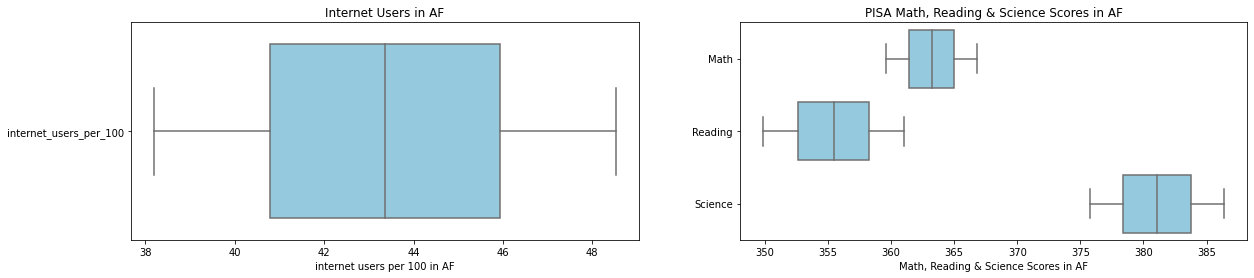

In [175]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sns.boxplot(data=dfAFinternet, orient='h', ax=axes[0], color="skyblue").set(title='Internet Users in AF')
sns.boxplot(data=dfAF3columns, orient='h', ax=axes[1], color="skyblue").set(title='PISA Math, Reading & Science Scores in AF')

axes[0].set(xlabel='internet users per 100 in AF')
axes[1].set(xlabel='Math, Reading & Science Scores in AF');


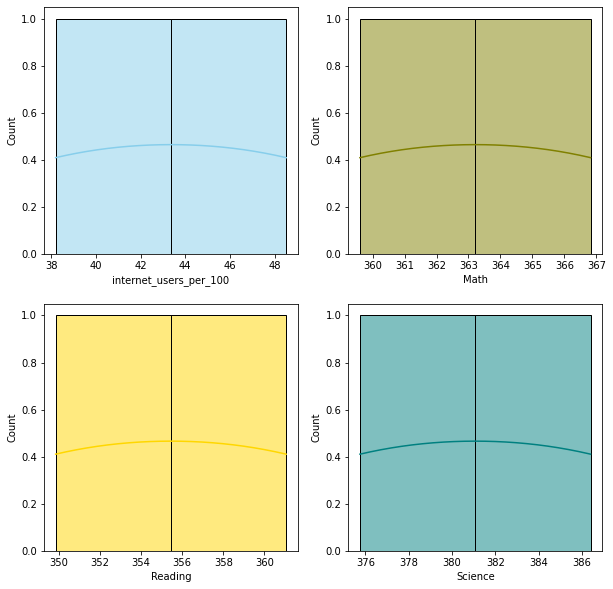

In [176]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfAF, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfAF, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfAF, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfAF, x="Science", kde=True, color="teal", ax=axs[1, 1]);

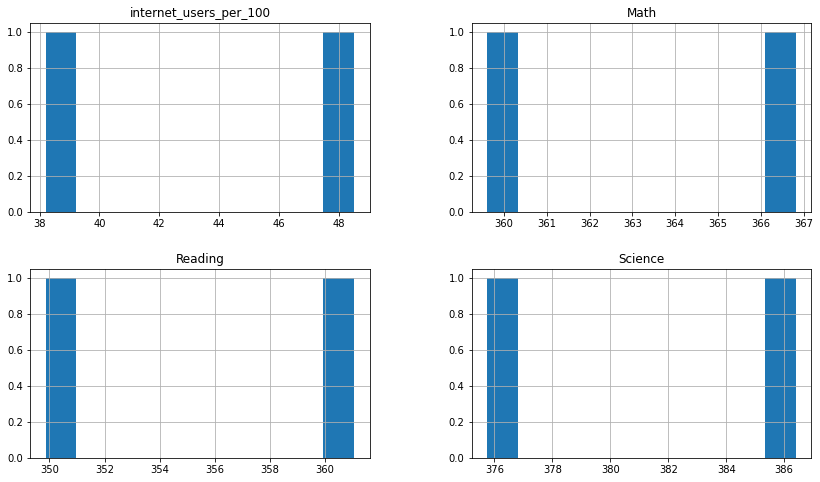

In [177]:
dfAF.hist(figsize=[14,8]);

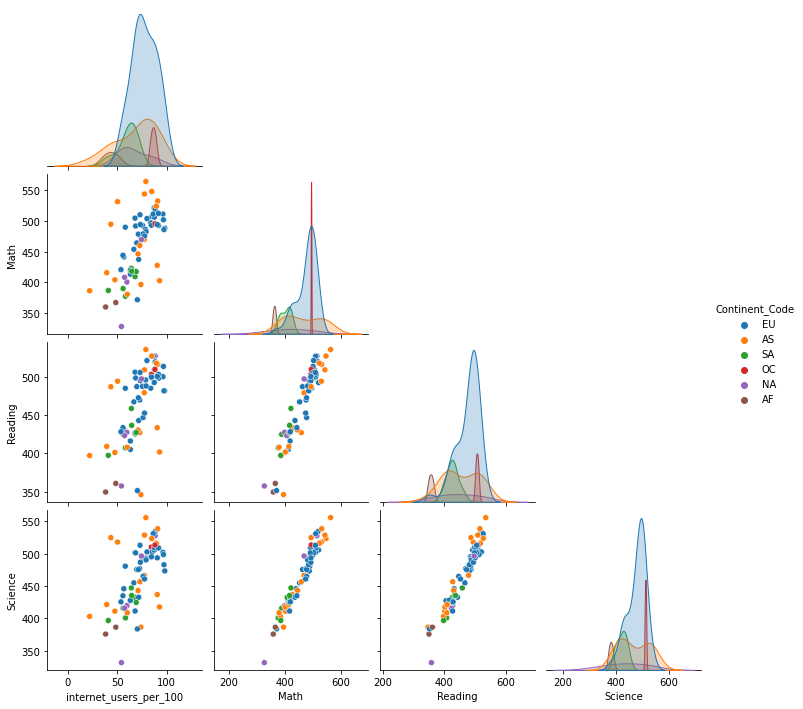

In [178]:
sns.pairplot(dfpisa, hue = 'Continent_Code', corner = True);

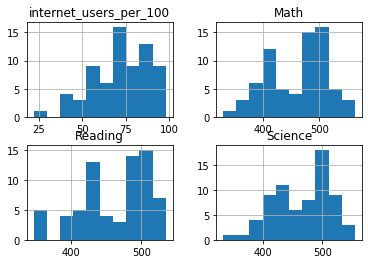

In [179]:
dfpisa.hist();

SOLUTION: (ii)


(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

The null hypothesis that the population means of the two groups are not significantly different (H0: μA = μB)

The alternative hypothesis is (H0: μA ≠ μB)

In [180]:
# With using nan_policy='omit'. 
# In this study we will use this t value found by nan_policy='omit'.

statistic, pvalue = stats.ttest_ind(dfEU.Math, dfAS.Math, nan_policy='omit')  # independet T test

statistic, pvalue

(0.870055317967983, 0.38826888111307345)

In [181]:
EU = dfpisa[dfpisa['Continent_Code']=='EU'].Math
AS = dfpisa[dfpisa['Continent_Code']=='AS'].Math
Mathstatistic, Mathpvalue = stats.ttest_ind(EU, AS, nan_policy='omit')   # independent T test

Mathstatistic, Mathpvalue 

## CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

(0.870055317967983, 0.38826888111307345)

Our test statistic is 0.870055317967983 and the corresponding two-sided p-value is 0.38826888111307345.

From standard normal table, the two-tailed critical value at 0.05% level of significance is tα/2 = 0.05/2 = 0.025 = 1.965 which is our critical value for t-value comparison.

If the calculated p-value (0.38826888111307345) is less than the critical alpha value (α/2 = 0.025), then we reject the null hypothesis (and conclude that the means are significantly different) OR vice verse.

(Since our calculated p-value is NOT less than the critical alpha value, the result is Fail to Reject)

In [182]:
critical_pvalue = 0.025

if Mathpvalue < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


In [183]:
dfEU.Math.describe()

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

In [184]:
dfAS.Math.describe()

count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

In [185]:
mathmeandiff = (dfEU.Math.mean()) - (dfAS.Math.mean())

mathmeandiff

11.764801589825083

DECISION AND CONCLUSIONS

Since calculated p value 0.38826888111307345 is greater than our chosen (critical) significance level of left and right tail α/2 = 0.025, we can fail to reject the null hypothesis, and have statistically NO SUFFICIENT EVIDENCE to conclude that the Math scores in EU and AS are significantly different from each other.

Based on the results, we can state the following:

There was NOT a significant difference in the average Math scores in EU and AS (t70 = 0.870055317967983, p < .05)

On average, Math scores in EU with 11.764801589825083 are slightly higher than the ones in AS; however, showing NO statistically difference among them.

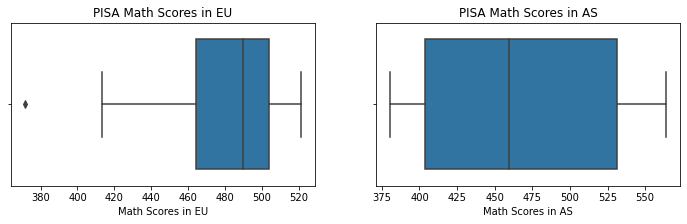

In [186]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

sns.boxplot(dfEU['Math'], ax=axes[0]).set(title='PISA Math Scores in EU')
sns.boxplot(dfAS['Math'], ax=axes[1]).set(title='PISA Math Scores in AS')

axes[0].set(xlabel='Math Scores in EU')
axes[1].set(xlabel='Math Scores in AS');

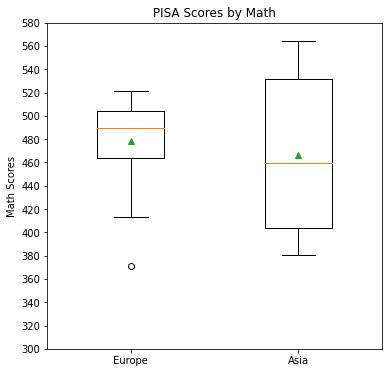

In [187]:
plt.figure(figsize=(6,6))
plt.boxplot([dfEU['Math'],dfAS['Math']], showmeans=True, widths = 0.4)

plt.title('PISA Scores by Math')
plt.ylabel('Math Scores')
plt.xticks([1, 2], ['Europe', 'Asia'])
y_ticks = np.arange(300, 600, 20)
plt.yticks(y_ticks);